Mechine Learing all topics
==========================
- 1.Linear regression
=====================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('ML/1_linear_reg/homeprices.csv')

In [15]:
df
#df[['price']] #'below both code will do same result'
# df.price 

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


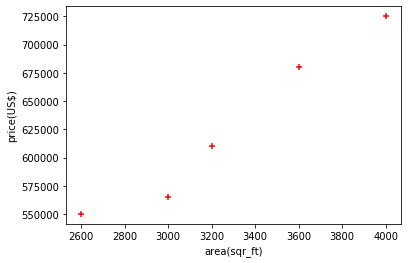

In [5]:
%matplotlib inline
plt.xlabel('area(sqr_ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(area,df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
area = df[['area']]
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


- Here we prediting the values i.e with help of model linear regression 
y = mx + b here and y= mx also those are the mathamethical model with help of that mathamatices we assume
tha coming the problem here we know the price and area sample data with help of sample data we can predict 
future or descreate values regarding sample data

In [21]:
reg.predict([[3300]])

array([628715.75342466])

In [22]:
reg.coef_

array([135.78767123])

In [23]:
reg.intercept_

180616.43835616432

In [24]:
#y = mx + b
135.78767123*3000 + 180616.43835616432

587979.4520461643

In [25]:
d = pd.read_csv('ML/1_linear_reg/areas.csv')
p = reg.predict(d)

In [26]:
d['prices'] = p

In [27]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [28]:
d.to_csv('ML/testprice.csv',index=False) # save the predicted price

2.Linear regression with multiple variables
========================================

In [43]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [44]:
df = pd.read_csv('ML/2_linear_reg_multivariate/homeprices.csv')
#df.bedrooms.mean() or df['bedrooms'].mean() 'two wil same result'
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [45]:
import math
df_bedroom=math.floor(df.bedrooms.mean())
df_bedroom

4

In [46]:
df.bedrooms = df.bedrooms.fillna(df_bedroom)
df.bedrooms

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [47]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [53]:
# fit the model by scikit learn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
'''
while fitting the model we have pass the target variables and predicable values 
or dependent and independent variable In this case target(showing interest or dependent variable)
variable is price and inputing variable(independaent variable) 
'''
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#The model looks like y1 = m1x1 + m2x2 + m3x3 + b
'''
b = intersepts 
m1,m2,m3 are slopes

'''
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [55]:
# its b intercept of build model 
reg.intercept_

221323.00186540408

In [56]:
#Here predict the price of the home was 3000 sqrt,3 bedrooms, 40 years old. And those supplied values are independent variables
reg.predict([[3000,3,40]])

array([498408.25158031])

In [57]:
# Cross varification the predicted values 
# price = m1x1 + m2x2 + m3x3 + b
112.06244194*3000 + 23388.88007794*3 + (-3231.71790863)*40 + 221323.00186540408

498408.2515740241

In [58]:
reg.predict([[2500,4,5]])

array([578876.03748933])

In [59]:
# Cross varification to predicted variables
112.06244194*2500 + 23388.88007794*4 + (-3231.71790863)*4 + 221323.00186540408

582107.7553926441

Excerise
========

In [60]:
df1 = pd.read_csv('ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [61]:
df_experiance = df1.experience.fillna('zero')
df_experiance

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [62]:
df1.experience = df1.experience.fillna(df_experiance)
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
import pickle
with open('ML/4_save_model/model_pickle','wb') as f:
    pickle.dump(model,f)
    

NameError: name 'model' is not defined

06.Dummy variable and one hot encoding 
=======================================

In [47]:
import pandas as pd
import numpy as np 

In [48]:
df = pd.read_csv('ML/5_one_hot_encoding/homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [49]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [50]:
merge = pd.concat([df,dummies],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [51]:
final = merge.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = final.drop('price',axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [53]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [54]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [56]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [57]:
model.score(x,y)

0.9573929037221873

In [58]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [85]:
x = dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [86]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

In [88]:
x = ohe.fit_transform(x).toarray()
x

E:\installation_files\python_instl\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [89]:
x = x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [90]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [94]:
model.predict([[2,0,3200]])

array([667221.02773597])

7.0 Training and testing dataset
=================================
Description
============
- Here we are divide the dataset into the training part and testing part 
It will share the entire dataset into training and testing

Then we can check the accuracy 

In [191]:
import pandas as pd
import numpy as np

df = pd.read_csv('ML/6_train_test_split/carprices.csv')
df


,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sell Price($)')

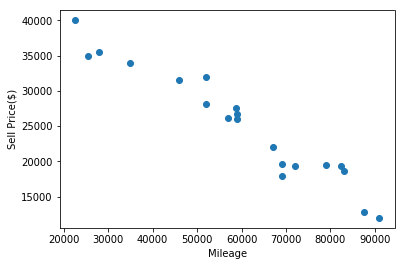

In [193]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')

Text(0, 0.5, 'Sell price($)')

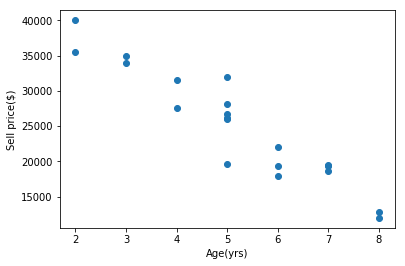

In [194]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.xlabel('Age(yrs)')
plt.ylabel('Sell price($)')

In [195]:
x = df[['Mileage','Age(yrs)']]
y = df[['Sell Price($)']]
x
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [197]:
x_train

,Mileage,Age(yrs)
1,35000,3
13,58780,4
2,57000,5
9,67000,6
4,46000,4
12,59000,5
19,52000,5
17,69000,5
14,82450,7
5,59000,5


In [198]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [199]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
clf.predict(x_test)
y_test

,Sell Price($)
7,19300
3,40000
0,18000
16,35500


In [201]:
clf.score(x_test,y_test)

0.9333449227914886

8.Logistic reggression
======================

Logistic Reggression (Binary classification)
Description 
Here we can classify the data into 
1) Linear regression like howe prices, wether prices, Stoke prices
Predicted values are continuous. any number  
2) Predicted values are categorical like email spam,will customer buy the life insurance(yes or no)
which party a persion is going to vode for
it's not number its defined  available categorical 

Classificaion problem 
1)BINARY CLASSIFICATION: persion will take insurance or not yes or not (binary)
2)MULTILINE CLASSIFICATION: Which party a persion is going to vote for??

Sigmoide or Logit Funtion:
sigmoid(z) = 1 / 1 + e (-z) 



In [228]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [229]:
df = pd.read_csv('ML/7_logistic_reg/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


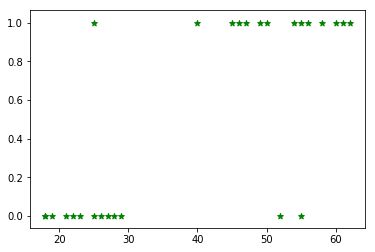

In [230]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='green')

In [231]:
df.shape

(27, 2)

In [232]:
df.size

54

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,test_size=0.1,random_state=10)

In [246]:
x_test

,age
7,60
5,56
18,19


In [247]:
# About the logistic regression as explained well but all are taken care by the scikit learning library

from sklearn.linear_model import LogisticRegression
# Creating the  model object
model = LogisticRegression()

In [248]:
#Fitting the trained data into model
model.fit(x_train,y_train)

E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [251]:
#Predict the values with smaple datasets 
model.predict(x_test)
# here as of we know the its the binary classification so its like only yes(one) or no(zero) 
# If the result is the one means persion will take insurance and result is zero persion won't take insurance 

array([1, 1, 0], dtype=int64)

In [254]:
# There are other options to check the predictition with probability with predict_proba funtion
model.predict_proba(x_test)
#model.predict_log_proba(x_test)

array([[0.20618565, 0.79381435],
       [0.24045662, 0.75954338],
       [0.6638168 , 0.3361832 ]])

In [256]:
#Checking the model score 
model.score(x_test,y_test)

1.0

In [259]:
# predict the insurance with know the age of 25
model.predict([[25]])

array([0], dtype=int64)

In [261]:
#Predict the insurace with know the age of 55 
model.predict([[55]])

array([1], dtype=int64)

08.Part of Logistic regression(multiclass classification):
==============================

- multiclass classification 
- it's completely for multiclass
- identify hand written digits 

In [2]:
# Here we importing the predefined dataset of handwritten images 
# binary data
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)
# data set having following files
# data(numrical data) and images(image of numbers)
# target are the end result after prediction

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

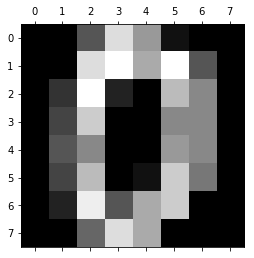

In [6]:
# visulising the or displaying the images
plt.gray()
plt.matshow(digits.images[0])

array([0, 1, 2, 3, 4])

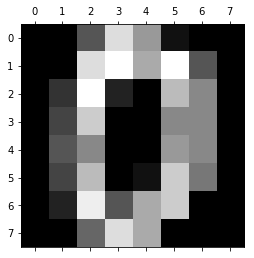

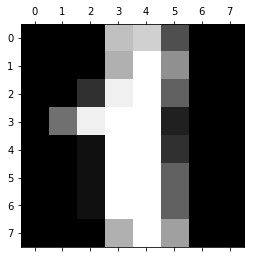

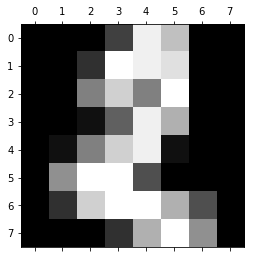

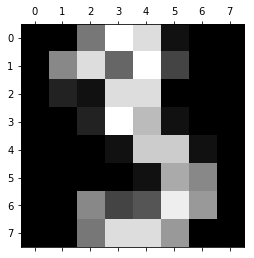

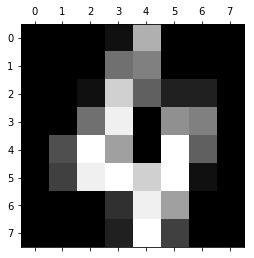

In [7]:
# printing the first five images
for i in range(5):
    plt.matshow(digits.images[i])
digits.target[0:5]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=.2)

In [9]:
len(x_test)

360

In [10]:
len(x_train)

1437

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
model.score(x_test,y_test)

0.9527777777777777

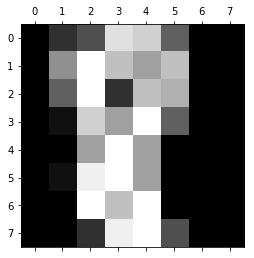

In [15]:
plt.matshow(digits.images[76])

In [16]:
model.predict([digits.data[76]])

array([8])

Confusion Mattrix
=================
Brife About the confusion mattrics
confusion mattrix will help us. where the model get fail or where
the model unable to perform oparation

it's help at what point get model get struck

In [27]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  2,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 38,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

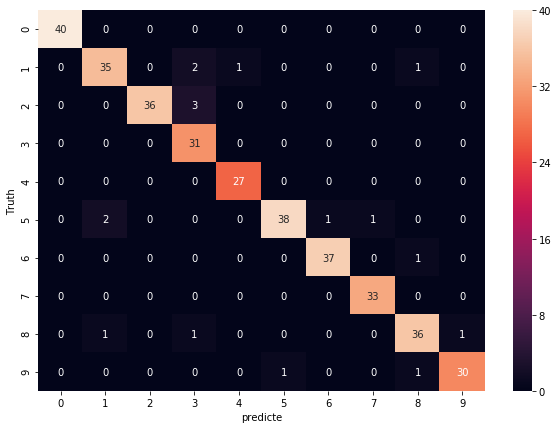

In [29]:
# seaborn library is like matplotlib
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicte')
plt.ylabel('Truth')
#In the seaborn graph where you found non zero values 
#AT those points model was unfit
#that 8 number image shown here is 1 at one time
#case at number 5 is predicted by model by 2 times as one(1)

9 Decision Tree:
    =============
    if want to do the prediction on dataset or sampling the data Learning the relation from dataset. for Accurate prediction want to sub divide the dataset into the small data(subset) sets. it's take by the Decision tree
    
    it's number of attributes that impact the while building the model or algathirm 
    
    How do you select ordering of features
    sample randomnes
    i) High information gain
    ii) low information gain
    
Gini impurity
    =============
    
     

In [56]:
import pandas as pd
df = pd.read_csv('ML/9_decision_tree/salaries.csv')
df
# Mechine learing lable will work on number only not labled data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [57]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [58]:
len(inputs.head())
len(target.tail())

5

In [59]:
len(inputs)

16

In [63]:
# here we have to convert the categorical labled data into numrical 
# for that purpose we are using the sklearn label encoder it will convert the 
#label data into numerical data
from sklearn.preprocessing import LabelEncoder
# Creating the lable objectes 
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [61]:
# Creating the new columns for new numerical lebled columns
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [62]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [64]:
 #dropping the original labeled columns, which not reguired
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [65]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


- now data set is ready for training the model

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)
# Criterial defualt gini we can use entropy as well

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now we want predict 

In [72]:
'''here the first position will be 1)company 2) job 3) degree
here the prediction will may be zero or one 
if predition zero salary might be less >100K
if predition was one it salary might me greather <100k
'''
model.predict([[1,2,0]])

array([1], dtype=int64)

In [74]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [75]:
model.predict([[2,0,1]])

array([1], dtype=int64)

In [78]:
#Here it is the small data set because the score will 1 
# Real time example the dataset size will more 
model.score(inputs_n,target)

1.0

In [77]:
model.predict_proba([[2,0,1]])

array([[0., 1.]])

10.Support Vector Mechine (SVM)
================================
it's famous classification algathim.Classification boundary
lower margin or higher margin 
higher margin near to classifiction sets 
Hyper plain 

Support vector meachine draws a hyper plane in n dimensional space such that it maximizes margin between classification groups

Gamma & Regulization
=====================
 Approches to draw boundary 
Gamma 
- 1) High gamma : its exaclty classfication 
- 2) Low Gamma : less accuracy, Might be error classification 

Approches to draw boundary 
C - regulariztion 
- 1) High regularization(c) : its exacly sepearate(features) the classification 
- 2) Low regularization(c) : Might be some error classification error 

For complex data set we need to create the third dimension(Z) 
- z = X2 + y2
- This trnasformation is called kernel 

In [92]:
# Here we are importing sklearn built in dataset called iris dataset and 
# load iris data in jupyter lab
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [93]:
# iris dataset values
iris.data
iris.DESCR
iris.feature_names
iris.filename
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [94]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [120]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [121]:
df[df.target==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [117]:
#Here target names order as the index corresponding to 
# 1)setosa -0 and 2)versicolor-1 3)virginica-2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [130]:
# As per above respective target_name indexs, flower name will add at 
#flower_name column
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()
df.to_csv('iris.csv',index=False) # exporting the new dataset to csv

In [131]:
# visualizing the dataset with help of matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [144]:
# make ready the dataframes of all different flowers as mentioned below 
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df1.head()
df2.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


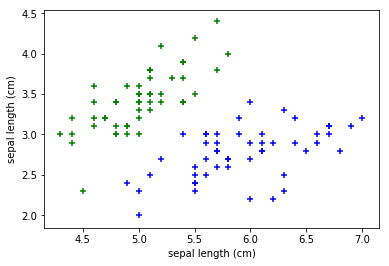

In [147]:
# Represent the dataset over visualization method
# visualize sepal lenth of different flower namely 
#setosa(0) verses versicolor(1)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker="+")

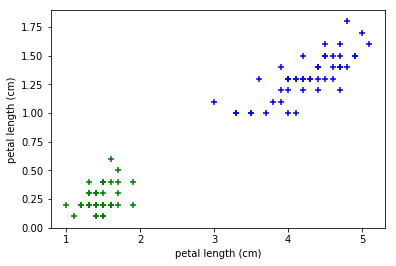

In [148]:
# Represent the dataset over visualization method
# visualize petal lenth of different flower namely 
#setosa(0) verses versicolor(1)

plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker="+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker="+")

In [149]:
# Now our dataset is ready for trainig 
from sklearn.model_selection import train_test_split

In [155]:
#make ready passing labeles into model fit 
x = df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [158]:
y = df.target
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int32

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [160]:
len(x_train)

120

In [161]:
len(y_test)

30

Now we have to train the model into svm(support vector machine)

In [191]:
from sklearn.svm import SVC
# here we can pass the arguments for tuning the model for accurcy 
# like C(Regularizrion),gamma.kernel
# you have to learn more about the all parameter svc model
model = SVC(gamma=10,kernel='sigmoid')

In [192]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [193]:
model.score(x_test,y_test)

0.3

12.Random forest algorithm
==========================
Divide the dataset to into apprapriate similary features into subsets 
Again and again classify the relation between the subsets

the part division of we make it as randomly 
sklearn provide the random forest  


In [1]:
# finding Handwritten data into numbers
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

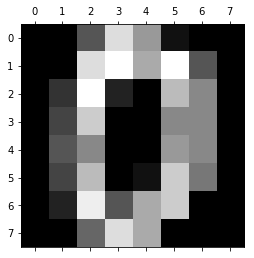

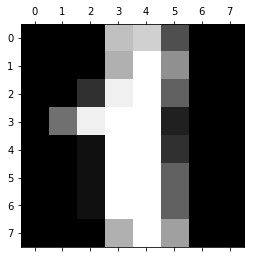

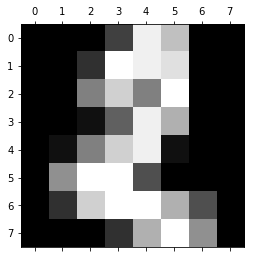

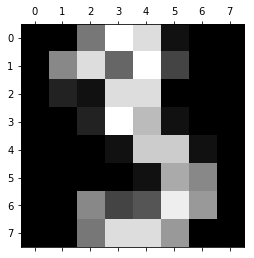

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [3]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [11]:
#Prepare the dataset for testing and training 
df = pd.DataFrame(digits.data)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [25]:
#Add new column for the data frame for convient
df['target']=digits.target
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [26]:
#Now we have to train and test the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [28]:
len(x_train)
len(x_test)

360

In [46]:
#ensemble is used for using multiple model together 
from sklearn.ensemble import RandomForestClassifier
# the parameter will affect the perfomance the accuracy like
#criterion='gini',n_estimators=50 those parameter will help tuning
#tuning the model 
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
model.score(x_test,y_test)

0.9888888888888889

In [48]:
# We have to visulize the testing and predicted values by ploting graph

y_predicted = model.predict(x_test) 

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm
#it's not good to visulize the confusion matric better way is by 
#seaborn library

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

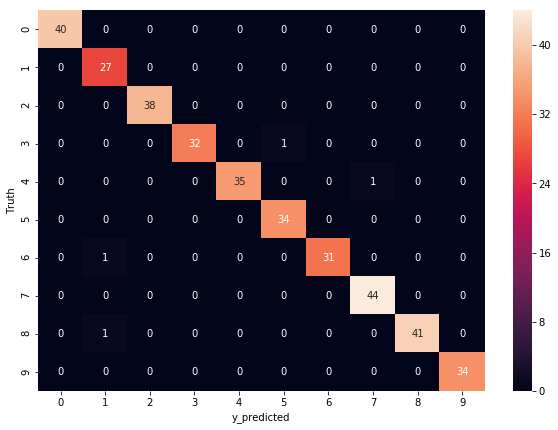

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('Truth')

Here we all explained about confusion matrix
suppose it you locate the 40 on graph the column and row values are (0,0)
Mean it's predicted 40 times as zero(0) as zero(0)
example it you locate the one(1) if check the corresponing column and rowas values
i.e (8,1) its reveals that is while predicting 8 number it predicted eighte(8) as 
as one (1) as 

12.Cross validation(K fold cross validation)
============================================
Evoluation model perfomance
find he best model to accurcy perfomance 
use all available data for training and test on same dataset(use entire dataset to both training and as well as tesing dataset)

- Split the dataset into training and testing dataset with randomization technique(supervised leaning)
That method is called sampling and resamling data 

* option 3(k fold crossvalidation)
make entire dataset as n- number of folds here take one fold as testing and rest of folds as training set 

* You have to calculte the individual score for each fold average score



In [52]:
# Now have to write the code 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3,random_state=0)

In [55]:
len(x_test)

540

In [56]:
len(x_train)

1257

We have to different classifier
===============================

In [63]:
# Logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9537037037037037

In [64]:
#Now we have try SVM 
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)# perfomance score is very poor

E:\installation_files\python_instl\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4722222222222222

In [66]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test) # The all the above model score is not same
# if run it multiple times it will changing 

E:\installation_files\python_instl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9462962962962963

Now we have to k fold method
============================

In [94]:
# Here the splits possess import role  
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [95]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)
# k fold model will split the dataset into training and testing equally 
# randomised automatically( shuffle data points among themselves) 

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [96]:
#By using below function we easily get score for all model 
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    
    return model.score(x_test,y_test)

In [97]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

E:\installation_files\python_instl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8997214484679665

In [98]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8969359331476323

In [99]:
get_score(SVC(),x_train,x_test,y_train,y_test)

E:\installation_files\python_instl\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5097493036211699

In [37]:
# we can do above perform with one model i.e k fold method 
# both k fold and StratifiedKFold same but StratifiedKFold better some conditions

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
score_l = []
score_svm = []
score_rf = []

for train_index,test_index in kf.split(digits.data,digits.target):
    x_train,x_test,y_train,y_test = digits.data[train_index],digits.data[test_index],\
    digits.target[train_index],digits.target[test_index]
    
    score_l.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    score_svm.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    score_rf.append(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))

NameError: name 'kf' is not defined

Above code will iterate the k fold splits for varies models like Logistic regression,svm,Random forest classifier
we will find the all model score for each fold record and we have take the average of the score, which model gives higest avg score that model fit for our analysis

In [108]:
score_l

[0.8964941569282137, 0.9515859766277128, 0.9115191986644408]

In [102]:
score_rf

[0.8848080133555927, 0.8914858096828047, 0.9065108514190318]

In [103]:
score_svm

[0.41068447412353926, 0.41569282136894825, 0.4273789649415693]

We can do above process by simply by sklearn library called cross val score with few steps
===========================================================================================

In [113]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),digits.data,digits.target))
print(cross_val_score(SVC(),digits.data,digits.target))
cross_val_score(RandomForestClassifier(),digits.data,digits.target)
# Above model create everything like folds and all above 
#Parameter tunning should focused 

E:\installation_files\python_instl\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\installation_files\python_i

[0.89534884 0.94991653 0.90939597]


E:\installation_files\python_instl\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.39368771 0.41068447 0.45973154]


E:\installation_files\python_instl\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\installation_files\python_instl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Futur

array([0.90531561, 0.9048414 , 0.91610738])

Random forest classifier their is tunning paramertes 

14.K means Clustering 
======================
Mechine learining 
==================
- 1) supervisised learing-  class label Labeled data or know inputs and targets
- 2) Unsupervised learining - unknown data, we have to find the relation between datasets. We do't know the target variable  
- 3) semi supervised learning
- 4) reinforsed learninig 

We have to find the clusters(k) in dataset. we have to identifiy the struckure 
its known to be centroids 

We have to find what will be the K - values. with help of elbow method  
 SSE (sum of squre error)
Draw graph is K(Number of centroids) verse SSE 

WE have to identifiy the some characterset inside dataset 

In [114]:
from sklearn.cluster import KMeans # Kmeans Cluster model
import pandas as pd
# reduce or scale down the features values lower level
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_csv('ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

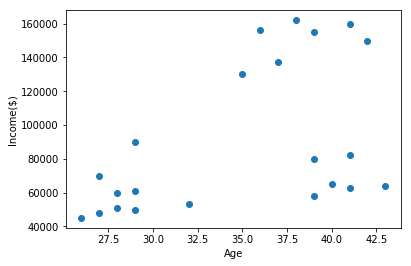

In [119]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [127]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [128]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,3
5,Gautam,39,155000,3
6,David,41,160000,3
7,Andrea,38,162000,3
8,Brad,36,156000,3
9,Angelina,35,130000,0


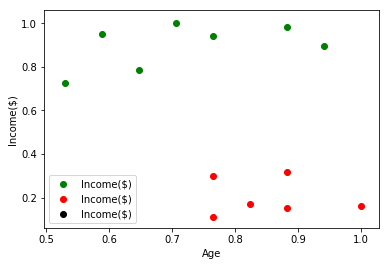

In [165]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


Here x and y label data are not praperly scale down 
its leads to imperfection in the plt.scatter plot we have to scale down 
age and income values by use sklearn library called minmax scaler 

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit([df.Age])
df.Age = scaler.transform(df.Age)


NameError: name 'MinMaxScaler' is not defined

In [150]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,3
5,Gautam,0.764706,0.940171,3
6,David,0.882353,0.982906,3
7,Andrea,0.705882,1.000000,3
8,Brad,0.588235,0.948718,3
9,Angelina,0.529412,0.726496,0


In [161]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [162]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [163]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

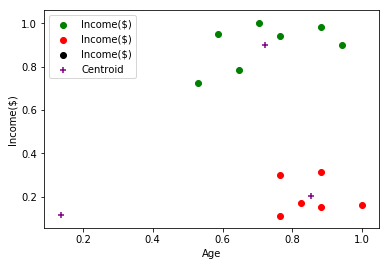

In [166]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple' \
            ,marker='+',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [170]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [171]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.22462070560435096,
 0.16869711728567785,
 0.1326541982724516,
 0.10188787724979424,
 0.0783123218004033]

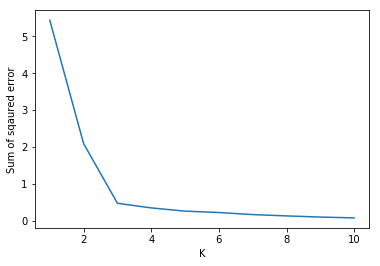

In [172]:
plt.xlabel('K')
plt.ylabel("Sum of sqaured error")
plt.plot(k_rng,sse)

Python data science handbook 
============================
A face detectcition pipeline


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
import numpy as np

E:\installation_files\anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
E:\installation_files\anaconda\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
E:\installation_files\anaconda\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Text(0.5, 1.0, 'visualization of HOG features')

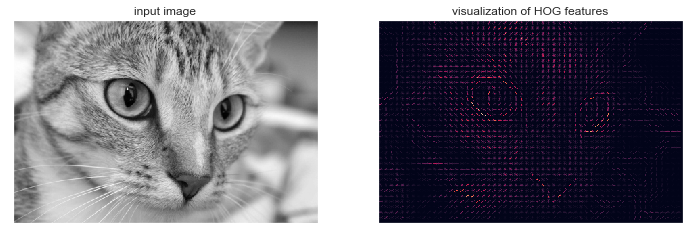

In [40]:
from skimage import data,color,feature
from matplotlib import pyplot as plt
import skimage.data
#image = color.rgb2gray(data.chelsea())
image = color.rgb2gray(data.chelsea())
hog_vec,hog_vis = feature.hog(image, visualise=True)
fig,ax = plt.subplots(1, 2, figsize=(12,12),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

In [41]:
 from sklearn.datasets import fetch_lfw_people       
faces = fetch_lfw_people()      
positive_patches = faces.images       
positive_patches.shape

OSError: cannot identify image file 'C:\\Users\\Hari\\scikit_learn_data\\lfw_home\\lfw_funneled\\Prince_Claus\\Prince_Claus_0002.jpg'

In [ ]:
from skimage import data, transform
imgs_to_use = ['camera', 'text', 'coins', 'moon','page', 'clock', 'immunohistochemistry','chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())for name in imgs_to_use]

from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int)) 
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N, random_state=0)    
    patches = extractor.transform(img[np.newaxis])    
    if scale != 1:        
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])    
        
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]]) 
negative_patches.shape

fig, ax = plt.subplots(6, 10)       
for i, axi in enumerate(ax.flat):           
    axi.imshow(negative_patches[500 * i], cmap='gray')           
    axi.axis('off')

    
from itertools import chain       
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])       
y_train = np.zeros(X_train.shape[0])       
y_train[:positive_patches.shape[0]] = 1
X_train.shap

In [ ]:
from sklearn.naive_bayes import GaussianNB       
from sklearn.cross_validation import cross_val_score
cross_val_score(GaussianNB(), X_train, y_train)


In [ ]:
from sklearn.svm import LinearSVC        
from sklearn.grid_search import GridSearchCV        
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})        
grid.fit(X_train, y_train)        
grid.best_score_


In [ ]:
grid.best_params_

In [ ]:
model = grid.best_estimator_        
model.fit(X_train, y_train)


In [ ]:
test_image = skimage.data.astronaut()        
test_image = skimage.color.rgb2gray(test_image)        
test_image = skimage.transform.rescale(test_image, 0.5)        
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')        
plt.axis('off');

In [ ]:
 def sliding_window(img, patch_size=positive_patches[0].shape,istep=2, jstep=2, scale=1.0):            
        Ni, Nj = (int(scale * s) for s in patch_size)            
        for i in range(0, img.shape[0] - Ni, istep):                
            for j in range(0, img.shape[1] - Ni, jstep):                    
                patch = img[i:i + Ni, j:j + Nj]                    
                if scale != 1:                        
                    patch = transform.resize(patch, patch_size)                    
                    yield (i, j), patch
        indices, patches = zip(*sliding_window(test_image))        
        patches_hog = np.array([feature.hog(patch) for patch in patches])        
        patches_hog.shape


In [ ]:
labels = model.predict(patches_hog)        
labels.sum()


In [ ]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')        
ax.axis('off')
Ni, Nj = positive_patches[0].shape        
indices = np.array(indices)
for i, j in indices[labels == 1]:           
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',alpha=0.3, lw=2,facecolor='none'))


<font color='blue'><h2 align='center'> Machine learning as per hands on mechine learing with scikit learning and tensorflow</h2></font>

**loading the datasets**

In [15]:
# import os
# import tarfile
# #from six.move import urllib
# import os
# import tarfile 
# #from six.moves import urllib
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
# HOUSING_PATH = "datasets/housing" 
# HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):   
#     if not os.path.isdir(housing_path):        
#         os.makedirs(housing_path)    
#     tgz_path = os.path.join(housing_path, "housing.tgz")    
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
    


In [16]:
# import pandas as pd
# # def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path,'housing.csv')

In [48]:
#import matplotlibtlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


In [49]:
#load the data
oecd_bli = pd.read_csv('c://Users/Hari/Desktop/datasets/lifesat//oecd_bli_2015.csv',thousands=',')
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [50]:
gdp_per_capita = pd.read_csv('c://Users//hari/Desktop/datasets/lifesat/gdp_per_capita.csv',
                            thousands=',',delimiter='\t',
                            encoding='latin1',na_values='n/a')

In [51]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [52]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [54]:
#prepare the data
country_stats =prepare_country_stats(oecd_bli, gpd_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

NameError: name 'gpd_per_capita' is not defined

**just ignore above first code**

# chapter -2
# End to end mechine learning projects

In [1]:
import os
import tarfile
import pandas as pd
import urllib

In [2]:
# download and load the dataaset from external source i.e github repository
#Download_Root = "https://github.com/ageron/handson-ml/master/"
DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT +  "datasets/housing/housing.tgz"
HOUSING_PATH
HOUSING_URL

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
# accessing the files in githut directroy
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [4]:
#now lets load the data to pandas dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('f://Python/Python_scripts/handson-ml-master/datasets/housing/housing.csv');df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


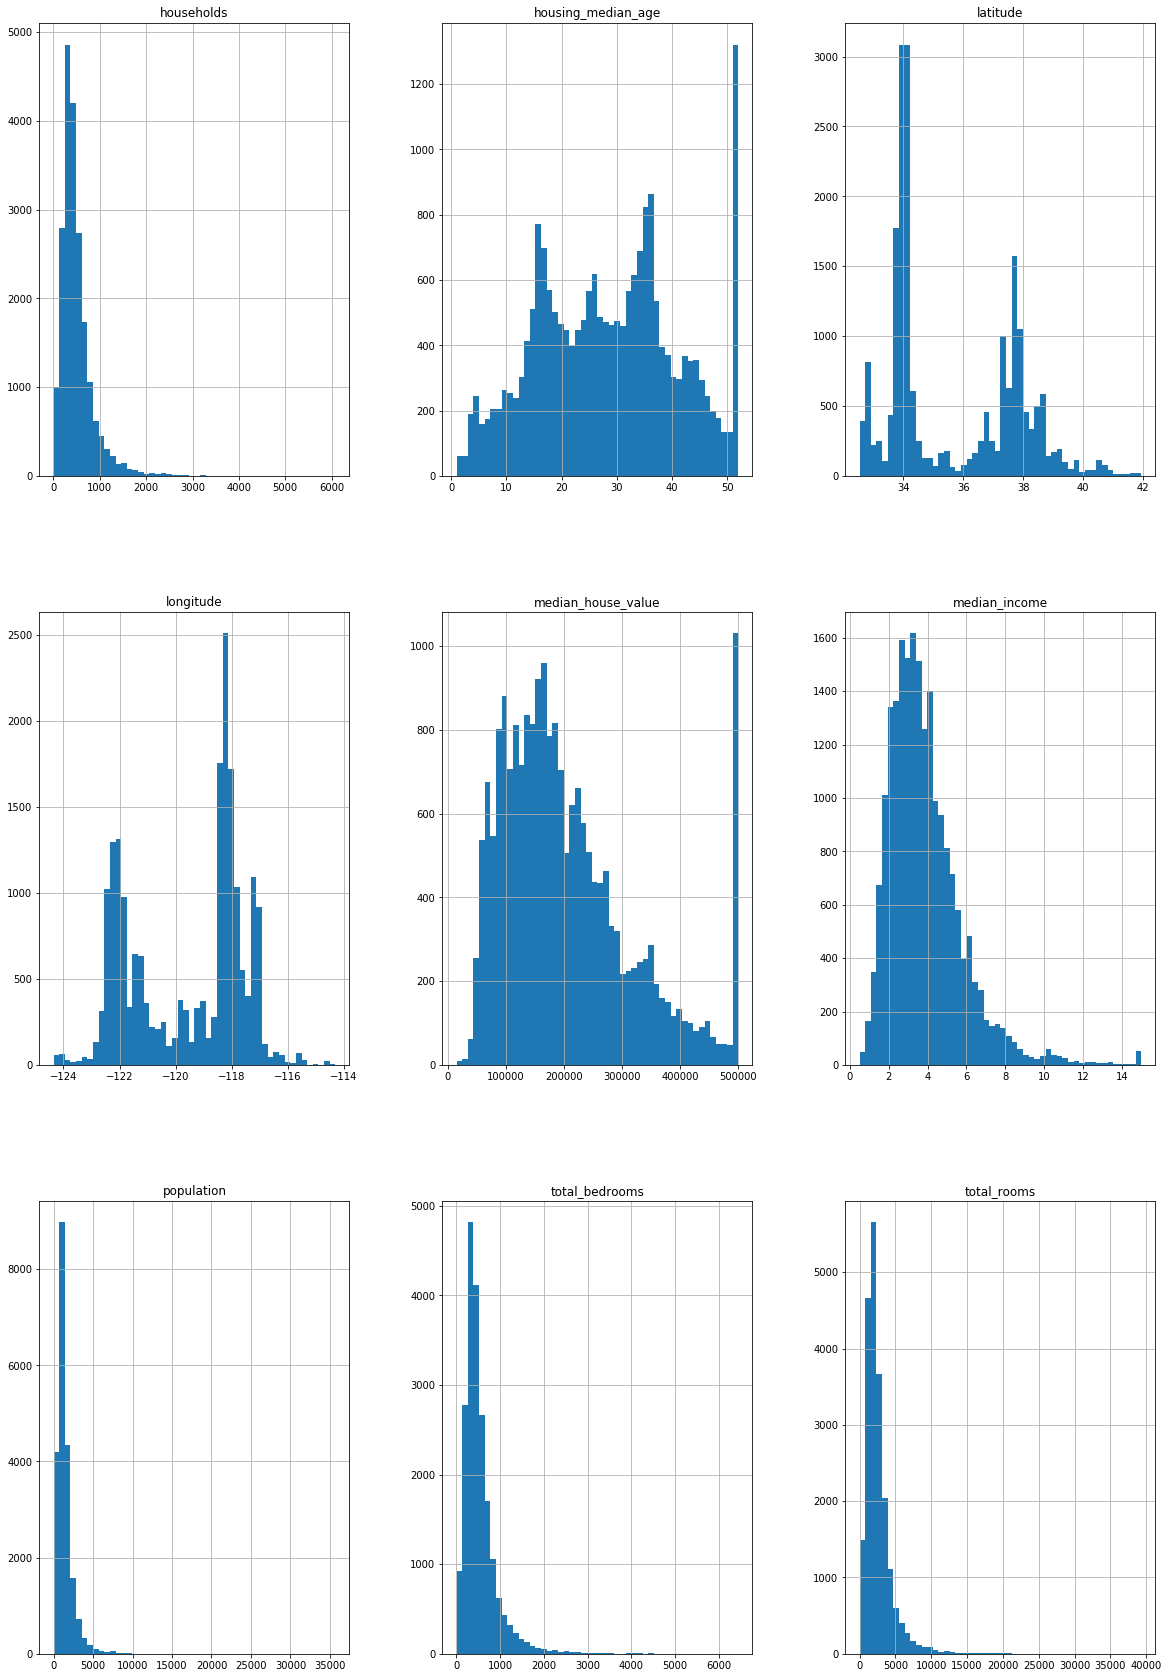

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,30))
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#find the correlation
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [12]:
df.cummin()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.23,37.86,21,880,129,322,126,8.3014,358500,NEAR BAY
2,-122.24,37.85,21,880,129,322,126,7.2574,352100,NEAR BAY
3,-122.25,37.85,21,880,129,322,126,5.6431,341300,NEAR BAY
4,-122.25,37.85,21,880,129,322,126,3.8462,341300,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-124.35,32.54,1,2,1,3,1,0.4999,14999,<1H OCEAN
20636,-124.35,32.54,1,2,1,3,1,0.4999,14999,<1H OCEAN
20637,-124.35,32.54,1,2,1,3,1,0.4999,14999,<1H OCEAN
20638,-124.35,32.54,1,2,1,3,1,0.4999,14999,<1H OCEAN


In [13]:
#find the covariance
df.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.876851e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-6.029962e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.700313e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.567306e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.191391e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.578295e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.180851e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.416878e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Createing a test data set
- Here we following the coventional python function to create test and training datasets
- Writing a function to divide dataset into two subsets as trainig dataset and test dataset

In [15]:
housing = df

In [16]:
#funtion for splitting the data set into two subsets
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [17]:
#Great its working fine the function partition data into the trainig,data sets
train_set,test_set=split_train_test(housing,0.2)

In [18]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20520,-121.53,38.58,35.0,1316.0,321.0,732.0,336.0,2.1213,79200.0,INLAND
3197,-119.67,36.35,10.0,1090.0,164.0,470.0,158.0,4.9432,118800.0,INLAND
7894,-118.08,33.86,17.0,2259.0,383.0,1378.0,386.0,5.8733,287000.0,<1H OCEAN
4052,-118.43,34.15,42.0,1293.0,214.0,459.0,217.0,7.6720,467600.0,<1H OCEAN
13388,-117.59,34.10,17.0,3646.0,1035.0,1987.0,895.0,2.3603,139300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
2004,-119.79,36.74,52.0,173.0,87.0,401.0,84.0,2.1094,75000.0,INLAND
5401,-118.42,34.03,44.0,904.0,176.0,358.0,158.0,3.3542,344200.0,<1H OCEAN
11340,-117.93,33.75,24.0,1380.0,339.0,1472.0,304.0,4.2219,162800.0,<1H OCEAN
11709,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,171900.0,INLAND


In [19]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15901,-122.41,37.74,34.0,1403.0,262.0,839.0,255.0,4.7031,255200.0,NEAR BAY
2611,-123.88,40.93,28.0,1272.0,259.0,519.0,220.0,3.2891,106300.0,<1H OCEAN
935,-122.04,37.50,17.0,407.0,97.0,307.0,100.0,3.1696,156300.0,NEAR BAY
10671,-117.85,33.62,18.0,729.0,105.0,316.0,108.0,10.3893,500001.0,<1H OCEAN
3797,-118.37,34.16,17.0,4150.0,1148.0,1808.0,1041.0,3.5051,232400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5292,-118.43,34.07,34.0,3203.0,483.0,949.0,439.0,10.3467,500001.0,<1H OCEAN
1172,-121.62,39.50,18.0,2105.0,416.0,974.0,385.0,1.6346,63300.0,INLAND
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,129200.0,NEAR OCEAN
12193,-117.35,33.64,23.0,6859.0,1535.0,3405.0,1351.0,2.5395,109200.0,<1H OCEAN


In [20]:
print(len(train_set) , 'train', len(test_set) ,'test')

16512 train 4128 test


- Here the problem was the this above partition shuffleing dividing the randomly every time 
test,training datasets was changing to overcome that randomness we have to use seeding


In [21]:
#funtion for splitting the data set into two subsets
import numpy as np
np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [22]:
train_data,test_data = split_train_test(housing,0.6)

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19660,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0,INLAND
4415,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0,<1H OCEAN
18113,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0,<1H OCEAN
17673,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0,<1H OCEAN
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [24]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,12384.000000,12384.000000,12384.000000,12384.000000,12177.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,-119.555670,35.610346,28.699855,2619.001453,533.480332,1413.292151,495.653666,3.871533,207099.408995
std,1.997588,2.130254,12.643342,2193.231114,422.223754,1115.069002,381.551044,1.891883,115165.856560
min,-124.350000,32.540000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1441.000000,295.000000,781.000000,278.000000,2.566350,120000.000000
50%,-118.490000,34.250000,29.000000,2116.500000,431.000000,1159.000000,406.000000,3.547500,180500.000000
75%,-118.000000,37.710000,37.000000,3124.500000,641.000000,1706.000000,600.000000,4.742600,265900.000000
max,-114.490000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [25]:
import hashlib

In [26]:
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [27]:
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,hash))
    return  data.loc[~in_test_set],data.loc[in_test_set]

In [31]:
housing_with_id = housing.reset_index()
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
train_set,test_set =split_train_test_by_id(housing_with_id,0.2,'index')

In [33]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20634,20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20619,20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
20625,20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND


# Scikit-learn provides a few functions to split datasets into multiple subsets in various ways.

In [35]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=2,shuffle =True)

In [36]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [37]:
# test_set
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# training and testing data selection not a simple task why because 
- in case of large data sets we need sample data and perform the analysis
Here we little bit used startified sampling
- we need to focus the data distribution .if the data is skewed so need to do transfomation
- without normarlize the data it will lead to improper results

In [38]:
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

In [39]:
# housing
housing.income_cat

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [40]:
housing['income_cat'].where(housing['income_cat'] < 5,5.0,inplace=True);housing.income_cat

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

# Now data is startified sampling

In [41]:
from __future__ import division, print_function, unicode_literals
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [42]:
start_test_set
start_test_set.columns
start_train_set.income_cat

17606    2.0
18632    5.0
14650    2.0
3230     2.0
3555     3.0
        ... 
6563     4.0
12053    2.0
13908    3.0
11159    3.0
15775    3.0
Name: income_cat, Length: 16512, dtype: float64

In [43]:
start_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


In [44]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [45]:
housing['income_cat'].value_counts() /len(housing)
# start_test_set.columns
start_train_set.income_cat

17606    2.0
18632    5.0
14650    2.0
3230     2.0
3555     3.0
        ... 
6563     4.0
12053    2.0
13908    3.0
11159    3.0
15775    3.0
Name: income_cat, Length: 16512, dtype: float64

In [46]:
for set in (start_train_set,start_test_set):
    set.drop(['income_cat'],axis=1,inplace=True)

In [47]:
start_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Discover and Visualize the Data to Gain Insights

In [48]:
housing = start_train_set.copy()

In [49]:
len(housing)

16512

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


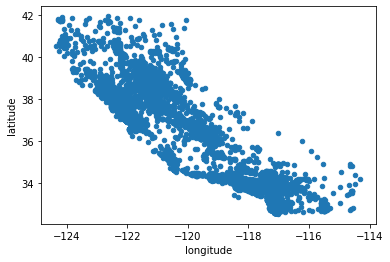

In [51]:
housing.plot(kind='scatter',x='longitude',y='latitude')

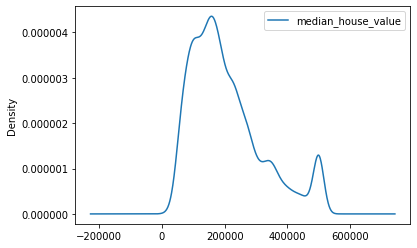

In [52]:
housing.plot(kind='density',x='population',y='median_house_value')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

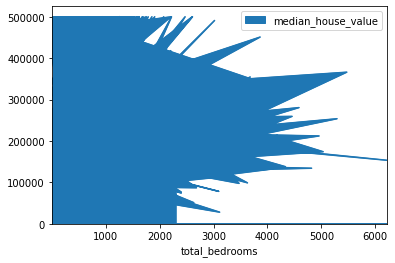

In [53]:
housing.plot(kind='area',x='total_bedrooms',y='median_house_value')
housing.columns

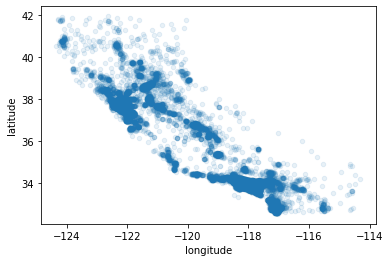

In [54]:
#plot with the density area with high thickness by alpha paramater
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

# Now briefly explore more about the plotting feature|


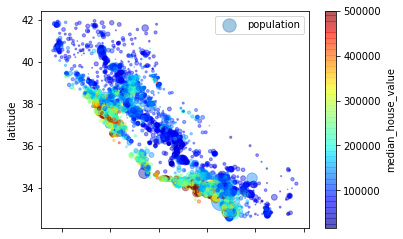

In [55]:
housing.plot(kind='scatter',x='longitude',y='latitude',
            alpha=0.4,s=housing['population']/100,label='population',
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

plt.legend()

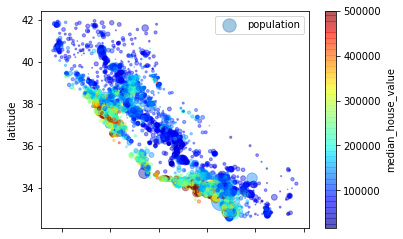

In [56]:
housing.plot(kind='scatter',x='longitude',y='latitude',
            alpha=0.4,s=housing['population']/100,label='population',
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

plt.legend()

# Looking for Correlations
<font color='red'><h2> Standard correlation coeffecient</h2></font>

In [57]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [58]:
corr_matrix['latitude'].describe()
#corr_matrix['median_house_value'].sort_values(ascending=False)

count    9.000000
mean    -0.049013
std      0.485436
min     -0.924478
25%     -0.115222
50%     -0.075205
75%     -0.039184
max      1.000000
Name: latitude, dtype: float64

In [59]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [60]:
corr_matrix['population'].max()
#corr_matrix['median_house_value'].sort_values(ascending=False)

1.0

In [61]:
corr_matrix['population'].sort_values(ascending=False)

population            1.000000
households            0.904637
total_bedrooms        0.876320
total_rooms           0.855109
longitude             0.108030
median_income         0.002380
median_house_value   -0.026920
latitude             -0.115222
housing_median_age   -0.298710
Name: population, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D83C7568C8>,
      dtype=object)

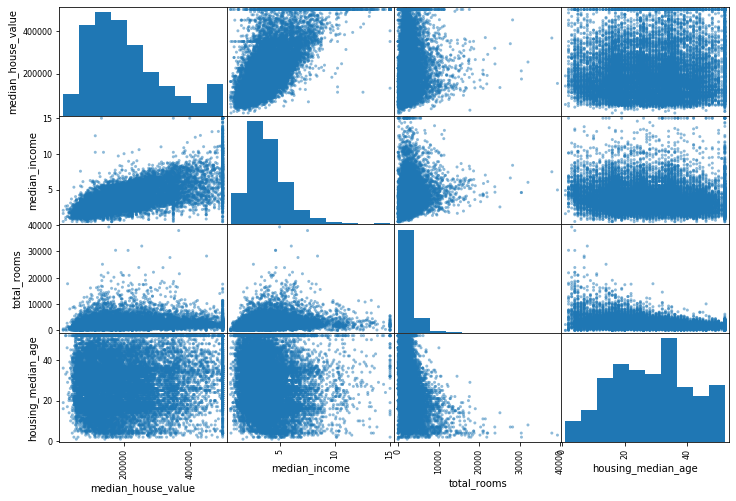

In [62]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=[12,8])

In [63]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


# Experimenting with attribute combination
- in case of large datasets we have combine columns to single columns.clean and clear data to model
- Now try out best column or attributes combination

In [64]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['households']/housing['population']
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [65]:
corr_matrix=housing.corr(method='pearson')

In [66]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
population_per_household    0.265312
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

<font color='green'><h2 align='center'> Prepare the date from machine learning Algorithms</h2></font>

In [67]:
#preparing the input variable
housing = start_train_set.drop('median_house_value',axis=1);housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [68]:
#Prepare the target variable for feeding machine learning model
housing_labels = start_train_set['median_house_value'].copy();housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

# Data Cleaning

- data cleaning by manually and by using sklearn
- Date cleaning by sklearn library methods 
- 1. imputer
- 2. replecing the values by staticstically know 

In [69]:
# Formal methods
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms',axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [70]:
# import pandas as pd
# pd.set_option.(display.)

from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='median')


In [71]:
housing_num = housing.drop('ocean_proximity',axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [72]:
s_imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [73]:
s_imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [74]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [75]:
housing_num.median().value_counts

<bound method IndexOpsMixin.value_counts of longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64>

In [76]:
housing_num.median().var

<bound method Series.var of longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64>

In [77]:
x = s_imputer.transform(housing_num)

In [78]:
x

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [79]:
houing_tr = pd.DataFrame(x,columns=housing_num.columns);houing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


# Handling text and categorical attributes

In [80]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encode = lb.fit_transform(housing_cat)
housing_cat_encode

array([0, 0, 4, ..., 1, 0, 3])

In [81]:
z =pd.DataFrame(housing_cat_encode);z
print(z.tail(5))
print(lb.classes_)
#print(lb.c)
#dir(lb)

       0
16462  0
16463  1
16464  1
16465  0
16466  0
16467  0
16468  4
16469  4
16470  0
16471  1
16472  0
16473  0
16474  0
16475  0
16476  1
16477  1
16478  0
16479  1
16480  0
16481  0
16482  1
16483  4
16484  1
16485  0
16486  0
16487  1
16488  1
16489  4
16490  3
16491  0
16492  3
16493  1
16494  1
16495  0
16496  1
16497  3
16498  1
16499  0
16500  0
16501  0
16502  4
16503  0
16504  1
16505  1
16506  0
16507  1
16508  1
16509  1
16510  0
16511  3
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


# So here labeling down as number series 0,1,2,3,4,5
- **One issue with this representation is that ML algorithms will assume that two nearby values
more same than distant values.

- but unfortunatily not like that to overcome that we choose tha onehot encoder

In [82]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
housing_ohe = ohe.fit_transform(housing_cat_encode.reshape(-1,1))
housing_ohe

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [83]:
housing_ohe.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# We can apply both transformation (from text categories to integer categories then from interger categories  into one-vector ) in one shot using the LabelBinarizer class in sklearn

In [84]:
from sklearn.preprocessing import LabelBinarizer
lbr = LabelBinarizer()
ohe1 = lbr.fit_transform(housing_cat)

In [85]:
ohe1.shape

(16512, 5)

# Custom Transfomers and fitting data into of encoded data into dataframe
- fit()
- transform()
- fit_transform()

In [86]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix, household_ix = 3,4,5,6

In [87]:
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self #nothing else to do
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,population_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
houseing_extra_attribs = attr_adder.transform(housing.values)


# Feature Scaling

In [94]:
#Transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs))
    ('imputer',SimpleImputer(strategy='median')),
    ('addribs_addr',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector('cat_attribs')),
    ('label_binarizer')
])
housing_num_tr = num_pipeline.fit_tranform(housing)

AttributeError: 'Pipeline' object has no attribute 'fit_tranform'

# <font color='blue'><h2 align='center'>3. Classification </h2></font>

In [1]:
import sklearn

In [5]:
# from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

In [17]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home);mnist

NameError: name 'custom_data_home' is not defined

In [15]:
import os
os.listdir()

['.ipynb_checkpoints',
 'basic_text_classification.ipynb',
 'Chatbot.ipynb',
 'checkpoint',
 'data.pickle',
 'datasets',
 'data_interview.ipynb',
 'handbook.ipynb',
 'intents.json',
 'iris.csv',
 'irisset.png',
 'Matplotlib.ipynb',
 'ML',
 'mL.ipynb',
 'my_mt_gig.png',
 'NLTK.ipynb',
 'pytorch.ipynb',
 'review_1.txt',
 'review_10.txt',
 'review_neg.txt',
 'review_pos.txt',
 'scatter.png',
 'sql_connct.ipynb',
 'tensorfl.ipynb',
 'training_data']

AttributeError: 'function' object has no attribute 'info'

In [19]:
from sklearn.model_selection import __name__
__name__

'sklearn.model_selection'

In [20]:
from sklearn.model_selection import __all__
__all__

('BaseCrossValidator',
 'GridSearchCV',
 'TimeSeriesSplit',
 'KFold',
 'GroupKFold',
 'GroupShuffleSplit',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'ShuffleSplit',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'fit_grid_point',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'validation_curve')

In [22]:
from sklearn.linear_model import __all__
__all__

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'enet_path',
 'lars_path',
 'lars_path_gram',
 'lasso_path',
 'logistic_regression_path',
 'orthogonal_mp',
 'orthogonal_mp_gram',
 'ridge_regression',
 'RANSACRegressor']

In [6]:
from sklearn import datasets
mnist =datasets.load_digits()

In [7]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [8]:
X,y = mnist['data'],mnist['target']

In [9]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
mnist.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [15]:
X.shape

(1797, 64)

In [17]:
y.shape

(1797,)

In [20]:
mnist.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
some_digits = X[36000]

IndexError: index 36000 is out of bounds for axis 0 with size 1797

In [28]:
from sklearn.datasets import fetch_openml,__package__,__all__,mldata_filename
#mnist = fetch_openml(name='mnist',)
__all__

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_rcv1',
 'fetch_kddcup99',
 'fetch_openml',
 'get_data_home',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_circles',
 'make_classification',
 'make_checkerboard',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll',
 '

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1 ,cache=True)

In [9]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [10]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [11]:
X,y= mnist['data'],mnist['target']

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

In [15]:
import matplotlib 
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
some_digit = X[37000]
some_digit_image = some_digit.reshape(28,28)

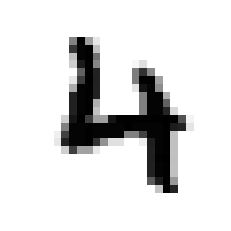

In [19]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.datasets import fetch_lfw_people

In [20]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [21]:
plt.gray()
plt.matshow(mnist['some_digit'][0])

KeyError: 'some_digit'

<Figure size 432x288 with 0 Axes>

# working with mnist datasets 

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1 ,cache=True)

In [4]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [8]:
X,y= mnist['data'],mnist['target']
some_digit = X[37000]
some_digit_image = some_digit.reshape(28,28)
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [14]:
y_trian_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier
sdc_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [20]:
sdc_clf.fit(X_train,y_trian_5)

ValueError: The number of classes has to be greater than one; got 1 class

In [21]:
from sklearn.preprocessing import  

SyntaxError: invalid syntax (<ipython-input-21-33c271b7ec58>, line 1)

# Ai with python - Data Preparation
# Preprossing the data

In [69]:
import numpy as np
from sklearn import preprocessing

In [70]:
# define sample data 
input_data = np.array([[2.1,-1.9,5.5],
                      [-1.5,2.4,3.5],
                      [0.5,-7.9,3.5],
                      [5.9,2.3,-5.8]]
                     )

In [71]:
input_data

array([[ 2.1, -1.9,  5.5],
       [-1.5,  2.4,  3.5],
       [ 0.5, -7.9,  3.5],
       [ 5.9,  2.3, -5.8]])

In [72]:
input_data.shape

(4, 3)

In [73]:
input_data.size

12

In [74]:
input_data.diagonal()

array([2.1, 2.4, 3.5])

In [75]:
input_data.sum(axis=1)

array([ 5.7,  4.4, -3.9,  2.4])

In [76]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.5)

In [77]:
data_binariy = bn.transform(input_data)

In [78]:
data_binariy

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

# technique 2: Mean removal

it is another very common preprocessing technique that is used in machine learning. Basically it is used to eliinate the mean from 
feature vector so that every feature is centered on zero
We can also remove the bias from features in the feature vector.For applying mean removeal preprocessing techinque on the samle data, we write 

In [79]:
print('mean=',input_data.mean(axis=0))
print('std=',input_data.std(axis=0))

mean= [ 1.75  -1.275  1.675]
std= [2.71431391 4.20022321 4.3922517 ]


**For removing the mean values we have to use sklearn library**

In [85]:
from sklearn.preprocessing import scale
sl = scale(input_data,with_mean=True,axis=0)

In [86]:
# print('mean=',sl.mean(axis=0))
# print('std=',sl.std(axis=0))

In [87]:
input_data

array([[ 2.1, -1.9,  5.5],
       [-1.5,  2.4,  3.5],
       [ 0.5, -7.9,  3.5],
       [ 5.9,  2.3, -5.8]])

In [88]:
sl

array([[ 0.12894603, -0.14880162,  0.87085173],
       [-1.19735598,  0.8749535 ,  0.41550442],
       [-0.46052153, -1.57729713,  0.41550442],
       [ 1.52893149,  0.85114524, -1.70186057]])

In [83]:
from sklearn.preprocessing import scale
sl = scale(input_data,with_std=True,axis=0)

In [84]:
sl

array([[ 0.12894603, -0.14880162,  0.87085173],
       [-1.19735598,  0.8749535 ,  0.41550442],
       [-0.46052153, -1.57729713,  0.41550442],
       [ 1.52893149,  0.85114524, -1.70186057]])

Techinque 3: Scaling
===================

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [92]:
mms.fit_transform(input_data)

array([[0.48648649, 0.58252427, 1.        ],
       [0.        , 1.        , 0.82300885],
       [0.27027027, 0.        , 0.82300885],
       [1.        , 0.99029126, 0.        ]])

# Technique 4: Normalization

It is another data preprocessing technique the is used to modify the feature vector
Such kind of modifications is necesary to measureve the feature vecors on a common scale

- L1 normalization
- L2 normalization

# L1 normalizaion 
* It is also refered as **Least Absolute deviation**:
this kind of normalization modifies the values so that the sum of the absolute values is always up to 1 in each row

In [97]:
from sklearn.preprocessing import normalize
norml1 = normalize()

In [105]:
norml1_n = normalize(input_data,norm='l1',axis=0)

In [106]:
norml1_n

array([[ 0.21      , -0.13103448,  0.30054645],
       [-0.15      ,  0.16551724,  0.19125683],
       [ 0.05      , -0.54482759,  0.19125683],
       [ 0.59      ,  0.15862069, -0.31693989]])

# L2 normalizaion 
* It is also refered as **Least squears**:
this kidn of normalization modifies the values so that the sum of the squares is always up to 1 in each row.

In [103]:
from sklearn.preprocessing import normalize


In [104]:
normalize(input_data,norm='l2',axis=0)

array([[ 0.32512259, -0.21642674,  0.58500708],
       [-0.23223042,  0.27338115,  0.37227723],
       [ 0.07741014, -0.89987961,  0.37227723],
       [ 0.91343966,  0.26199027, -0.61691656]])

# Labeling encoding steps

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [3]:
input_labels = ['red','black','green','black','yellow','white']

In [32]:
inv_labeles = [1,0,4,3]

In [4]:
input_labels

['red', 'black', 'green', 'black', 'yellow', 'white']

In [33]:
lb.inverse_transform(inv_labeles)

array(['green', 'black', 'yellow', 'white'], dtype='<U6')

In [34]:
lb.fit_transform(input_labels)

array([2, 0, 1, 0, 4, 3], dtype=int64)

In [26]:
lb.fit(input_labels)

LabelEncoder()

In [12]:
label = ['green','red','black']

In [13]:
label

['green', 'red', 'black']

In [14]:
lb.fit_transform(label)

array([1, 2, 0], dtype=int64)

In [28]:
encode_values = [1,0,2,1]

In [29]:
decode_vlaues = lb.inverse_transform(encode_values)

In [30]:
decode_vlaues

array(['green', 'black', 'red', 'green'], dtype='<U6')

# data preprocessing 

In [16]:
import numpy as np
import pandas as pd
data = pd.DataFrame({
    'Normal':np.random.normal(100,50,1000),
    'Exponential':np.random.exponential(25,1000),
    'Uniform': np.random.uniform(-150,-50,1000)
})

In [17]:
data

,Normal,Exponential,Uniform
0,77.479016,1.480693,-123.648468
1,69.657060,73.485342,-79.441911
2,65.389210,15.314304,-76.772624
3,80.439559,6.628065,-53.576282
4,24.118655,38.868285,-89.599565
...,...,...,...
995,126.594543,30.058858,-123.563089
996,178.709196,29.474654,-52.125600
997,8.338338,39.817965,-115.352745
998,130.944978,15.316871,-82.660271


(array([0.00011714, 0.00058571, 0.00175713, 0.00436354, 0.00732137,
        0.00802422, 0.00442211, 0.00219641, 0.00035143, 0.00014643]),
 array([-72.74531507, -38.59870711,  -4.45209914,  29.69450882,
         63.84111679,  97.98772475, 132.13433271, 166.28094068,
        200.42754864, 234.57415661, 268.72076457]),
 <a list of 10 Patch objects>)

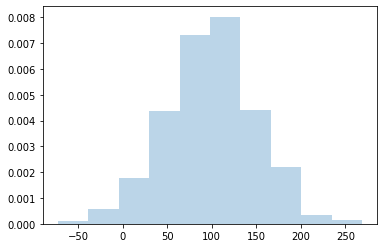

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(data['Normal'],density=True,alpha=.3)

(array([0.01080911, 0.01060894, 0.00900759, 0.00980827, 0.01211021,
        0.0096081 , 0.01060894, 0.00990835, 0.00800675, 0.0096081 ]),
 array([-149.99473533, -140.00316673, -130.01159814, -120.02002954,
        -110.02846095, -100.03689235,  -90.04532375,  -80.05375516,
         -70.06218656,  -60.07061797,  -50.07904937]),
 <a list of 10 Patch objects>)

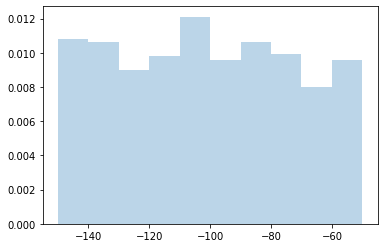

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(data['Uniform'],density=True,alpha=.3)

(array([2.90226229e-02, 1.37366863e-02, 4.49282596e-03, 2.68536724e-03,
        9.29550199e-04, 3.61491744e-04, 2.06566711e-04, 1.54925033e-04,
        0.00000000e+00, 5.16416777e-05]),
 array([1.78810281e-02, 1.93820854e+01, 3.87462897e+01, 5.81104941e+01,
        7.74746984e+01, 9.68389028e+01, 1.16203107e+02, 1.35567311e+02,
        1.54931516e+02, 1.74295720e+02, 1.93659925e+02]),
 <a list of 10 Patch objects>)

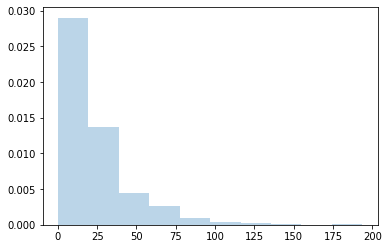

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(data['Exponential'],density=True,alpha=.3)

In [21]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0, 1)).fit_transform(data)
# min_max.fit_transform(data)
# min_max.fit_transform(data)

In [22]:
def plot_scaling_results(data,scaled_data,scaling_title,x_lim=(-5,5)):
    scaled_df = pd.DataFrame(
        scaled_data,
        columns=['Normal','Exponential','Uniform']
    )


    fig,(ax1,ax2) = plt.subplots(ncols=2)
    ax1.set_xlim(-300,300)
    ax1.set_title('NO scaling')
    sns.kdeplot(data.Normal,ax=ax1)
    sns.kdeplot(data.Exponential,ax=ax1)
    sns.kdeplot(data.Uniform,ax=ax1)

    #SEdning data to the second graph
    ax2.set_xlim(x_lim)
    ax2.set_title(scaling_title)
    sns.kdeplot(scaled_df.Normal,ax=ax2)
    sns.kdeplot(scaled_df.Exponential,ax=ax2)
    sns.kdeplot(scaled_df.Uniform,ax=ax2)


# min-max-scaler will convert the entire data set will convert in range of (0,1)

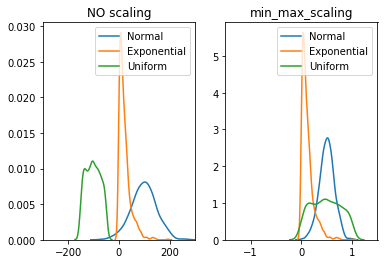

In [23]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1)).fit_transform(data)
# min_max.fit_transform(data)
plot_scaling_results(data,min_max,'min_max_scaling',(-1.5, 1.5 ))

In [24]:
scaled_df = pd.DataFrame(min_max, columns=['Normal', 'Exponential', 'Uniform'])
min_max

array([[0.43993925, 0.00755421, 0.263685  ],
       [0.41703227, 0.3793983 , 0.7061236 ],
       [0.40453367, 0.07899329, 0.732839  ],
       ...,
       [0.23745742, 0.20553431, 0.34671223],
       [0.59651692, 0.07900655, 0.67391284],
       [0.35172475, 0.05642247, 0.96692578]])

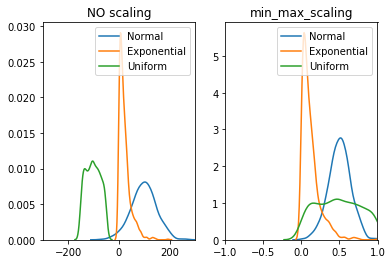

In [25]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1)).fit_transform(data)
# min_max.fit_transform(data)
plot_scaling_results(data,min_max,'min_max_scaling',(-1,1 ))

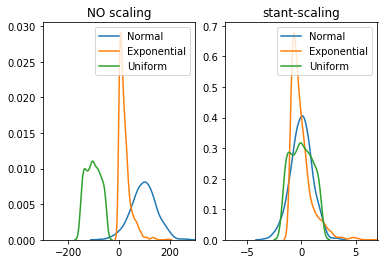

In [26]:
from sklearn.preprocessing import StandardScaler

stand_scaled = StandardScaler().fit_transform(data)
plot_scaling_results(data,stand_scaled,'stant-scaling',(-7,7))

In [27]:
stand_scaled

array([[-0.42307184, -0.92895378, -0.78084246],
       [-0.57945781,  2.16160236,  0.76113165],
       [-0.6647858 , -0.33519281,  0.85423938],
       ...,
       [-1.80541546,  0.716544  , -0.4914784 ],
       [ 0.64588401, -0.33508263,  0.64887165],
       [-1.02531227, -0.52278861,  1.67007178]])

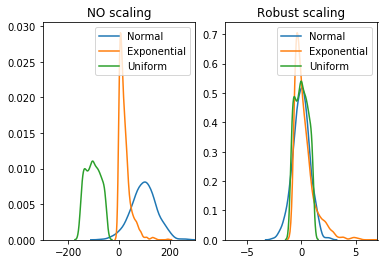

In [28]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler().fit_transform(data)
# min_max.fit_transform(data)
plot_scaling_results(data,Robust,'Robust scaling',(-7,7 ))

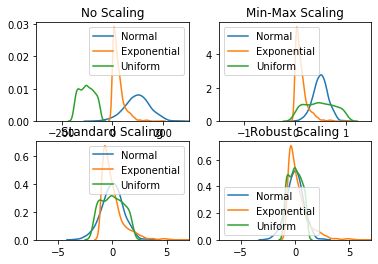

In [29]:
def plot_scaling(scaled_data, title, x_lim, ax):
  scaled_df = pd.DataFrame(
      scaled_data, 
      columns=['Normal', 'Exponential', 'Uniform']
  )

  ax.set_xlim(x_lim)
  ax.set_title(title)
  sns.kdeplot(scaled_df.Normal, ax=ax)
  sns.kdeplot(scaled_df.Exponential, ax=ax)
  sns.kdeplot(scaled_df.Uniform, ax=ax);

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.set_xlim((-300, 300))
ax1.set_title('No Scaling')
sns.kdeplot(data.Normal, ax=ax1)
sns.kdeplot(data.Exponential, ax=ax1)
sns.kdeplot(data.Uniform, ax=ax1)

plot_scaling(min_max, "Min-Max Scaling", (-1.5, 1.5), ax2)

plot_scaling(stand_scaled, "Standard Scaling", (-7, 7), ax3)

plot_scaling(Robust, 'Robust Scaling', (-7, 7), ax4)

In [30]:
property_type = np.array(['house',
                         'unit',
                          'thownhouse',
                          'house',
                          'unit'
                         ]).reshape(-1,1)

In [31]:
property_type

array([['house'],
       ['unit'],
       ['thownhouse'],
       ['house'],
       ['unit']], dtype='<U10')

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder().fit(property_type)
labels = enc.transform(property_type)
l =labels.flatten();l

array([0., 2., 1., 0., 2.])

In [33]:
s = l.reshape(-1,1)
enc.inverse_transform(s).flatten()

array(['house', 'unit', 'thownhouse', 'house', 'unit'], dtype='<U10')

In [34]:
s

array([[0.],
       [2.],
       [1.],
       [0.],
       [2.]])

# One hotencoding 

In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False).fit_transform(property_type)

In [36]:
ohe

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [37]:
ohe

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

# Adding New features

In [38]:
n_rooms = np.array([1,2,1,4,6,7,12,20])

In [39]:
pd.cut(n_rooms,bins=[0,3,8,20],labels=['small','medium','large'])

[small, small, small, medium, medium, medium, large, large]
Categories (3, object): [small < medium < large]

In [40]:
import calendar as c
i = c.calendar(2019)
print('/n')
print(i)

/n
                                  2019

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6                   1  2  3                   1  2  3
 7  8  9 10 11 12 13       4  5  6  7  8  9 10       4  5  6  7  8  9 10
14 15 16 17 18 19 20      11 12 13 14 15 16 17      11 12 13 14 15 16 17
21 22 23 24 25 26 27      18 19 20 21 22 23 24      18 19 20 21 22 23 24
28 29 30 31               25 26 27 28               25 26 27 28 29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7             1  2  3  4  5                      1  2
 8  9 10 11 12 13 14       6  7  8  9 10 11 12       3  4  5  6  7  8  9
15 16 17 18 19 20 21      13 14 15 16 17 18 19      10 11 12 13 14 15 16
22 23 24 25 26 27 28      20 21 22 23 24 25 26      17 18 19 20 21 22 23
29 30                  

In [41]:
from __future__ import division,print_function,unicode_literals
#common import 
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
#to pretty figure
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('axes',labelsize=12)
mpl.rc('axes',labelsize=11)

#ignore useless warning 
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [42]:
import numpy as np
from matplotlib import pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

[0, 2, 0, 15]

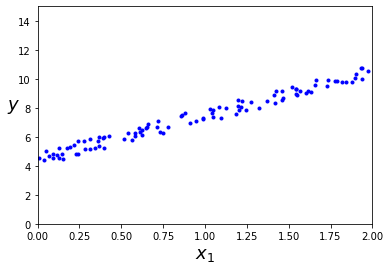

In [43]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [44]:
import numpy as np
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [45]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [46]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [47]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

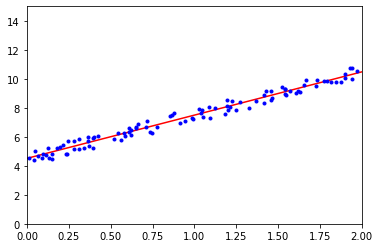

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()


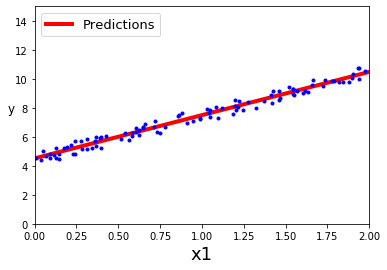

In [49]:
plt.plot(X_new,y_predict,'r-',linewidth=4,label='Predictions')
plt.plot(X,y,'b.')
plt.xlabel('x1',fontsize=18)
plt.ylabel('y',rotation=0,fontsize=12)
plt.legend(loc='upper left',fontsize=13)
plt.axis([0,2,0,15])
plt.savefig('hari.png')

In [50]:
import os 
os.remove('f:/Python/Python_scripts/python_ml/hari.png')

In [51]:
os.listdir('f:/Python/Python_scripts/python_ml')

['.ipynb_checkpoints',
 'basic_text_classification.ipynb',
 'Chatbot.ipynb',
 'checkpoint',
 'data.pickle',
 'datasets',
 'data_interview.ipynb',
 'handbook.ipynb',
 'intents.json',
 'iris.csv',
 'irisset.png',
 'Matplotlib.ipynb',
 'ML',
 'mL.ipynb',
 'my_mt_gig.png',
 'NLTK.ipynb',
 'practice.ipynb',
 'pytorch.ipynb',
 'review_1.txt',
 'review_10.txt',
 'review_neg.txt',
 'review_pos.txt',
 'scatter.png',
 'sql_connct.ipynb',
 'tensorfl.ipynb',
 'training_data']

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lin_reg.coef_,lin_reg.intercept_

(array([[2.98323418]]), array([4.51359766]))

In [54]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [55]:
theta_best_svd,residual,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [56]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

In [57]:
# linear regression using batch gradient descent
eta = 0.1
m= 100
n_iterations = 1000
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gredients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gredients
    

In [58]:
theta

array([[4.51359766],
       [2.98323418]])

In [59]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

# principal component analysis

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [61]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T

In [62]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

([array([ 2.,  3., 11., 29., 45., 52., 28., 20.,  7.,  3.]),
  array([ 0.,  0.,  0.,  8., 73., 98., 20.,  1.,  0.,  0.])],
 array([-2.48838277, -2.00660589, -1.52482901, -1.04305214, -0.56127526,
        -0.07949838,  0.40227849,  0.88405537,  1.36583225,  1.84760912,
         2.329386  ]),
 <a list of 2 Lists of Patches objects>)

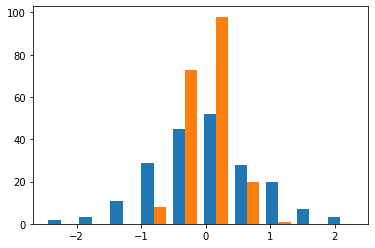

In [63]:
plt.hist(X)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

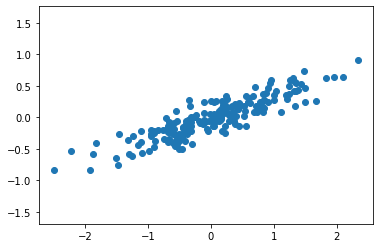

In [64]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [68]:
print(pca.tol)

0.0


In [69]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [70]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)


(-2.7391278364515688,
 2.5801310701596343,
 -2.744447806068697,
 2.585451039776762)

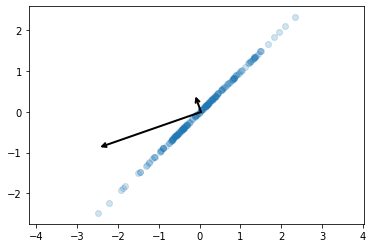

In [71]:
plt.scatter(X[:,0],X[:,0],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')

# pca as dimentionality reduction

In [72]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
x_pca = pca.transform(X)

In [74]:
print(X.shape)
print(x_pca.shape)

(200, 2)
(200, 1)


we can perform inverse transformation

(-2.77152878069022, 2.661757596590676, -2.744447806068697, 2.585451039776762)

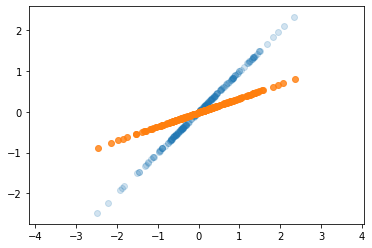

In [78]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(X[:,0],X[:,0],alpha=0.2)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8)
plt.axis('equal')

 # PCA for visualization handwritten digits

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()

In [80]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [81]:
digits.data.shape

(1797, 64)

In [82]:
pca = PCA(n_components=2,random_state=2)
# pca = PCA(n_components=4,random_state=2)

In [83]:
projected = pca.fit_transform(digits.data)

In [84]:
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


# we can plot the first two principal components of each points to learn about data 

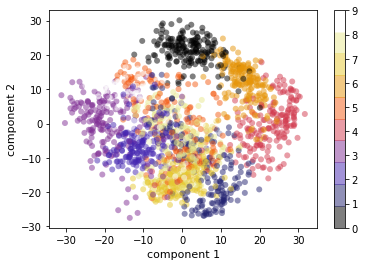

In [85]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,
           edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('CMRmap',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# choose the exact number of components 

Text(0, 0.5, 'cumlative explained variance')

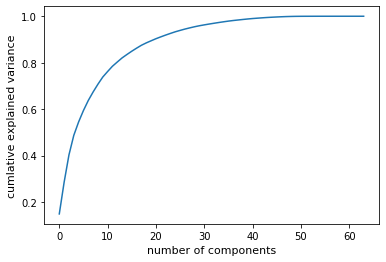

In [86]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [87]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),
                           subplot_kw={'xticks':[],'yticks':[]},
                           gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
             cmap='binary',clim=(0,16),interpolation='nearest')    

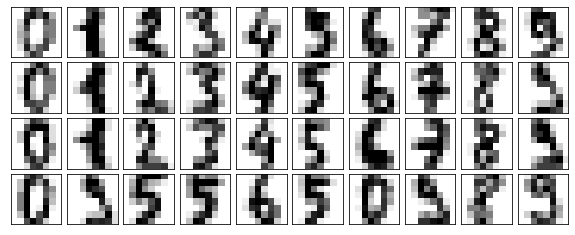

In [88]:
plot_digits(digits.data)

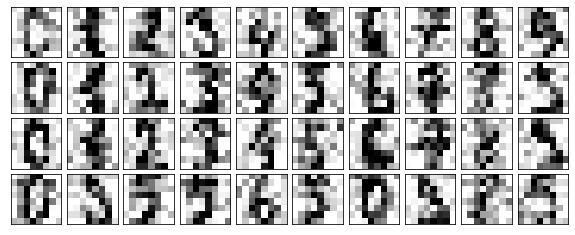

In [89]:
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [90]:
pca = PCA(.50).fit(noisy)
pca.n_components_

12

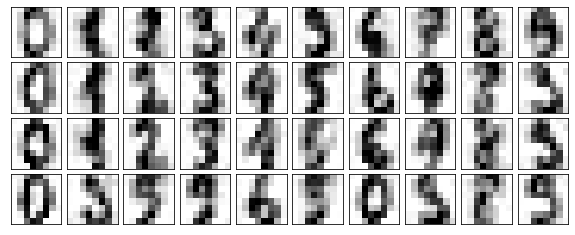

In [91]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Examle : Eigenfaces 

In [92]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [93]:
dir(faces)

['DESCR', 'data', 'images', 'target', 'target_names']

In [94]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [95]:
from sklearn.decomposition import PCA as RandomizedPCA


# pca = randomized_svd(n_components=150)

In [96]:
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True).fit(faces.data)


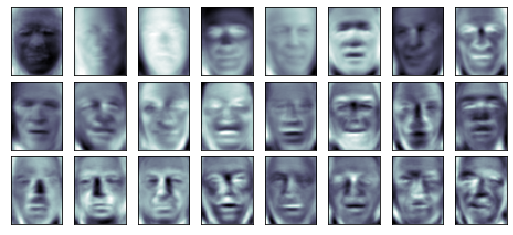

In [124]:
fig, ax = plt.subplots(3,8,figsize=(9,4),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(ax.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

In [101]:
# comulative variance ratio of thise components

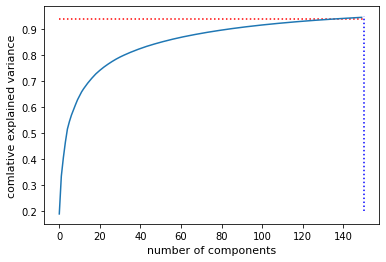

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('comlative explained variance')
plt.vlines(150,0.2,0.95,linestyles='dotted',color='b')
plt.hlines(0.94,0,150,linestyles='dotted',color='r')

In [115]:
# compute the components and projected face 
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

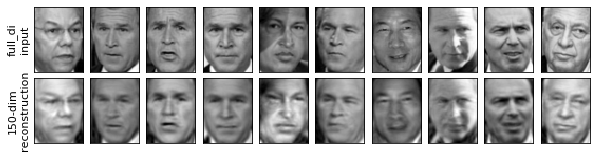

In [122]:
# plot the results
fig, ax = plt.subplots(2,10,figsize=(10,2.5),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')

ax[0,0].set_ylabel('full_di\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')
                   

# iris dataset PCA analysise

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1,random_state=2)
iris_proj = pca.fit_transform(iris.data)

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris_proj.shape

(150, 1)

Text(0, 0.5, 'cumlative explained variance')

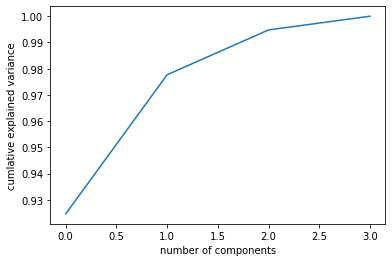

In [25]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(iris.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,random_state=2)
iris_proj = pca.fit_transform(iris.data)

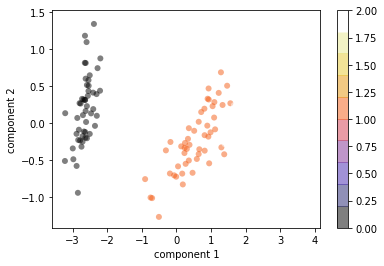

In [31]:
plt.scatter(iris_proj[:,0],iris_proj[:,1],c=iris.target,
           edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('CMRmap',10))
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.colorbar()

# In depth main fold learning

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [246]:
def make_hello(N=1000,rseed=42):
    #make a plot with 'Hello' and save as png
    fig,ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    ax.text(0.5,0.4,'HELLO',va='center',ha='center',weight='bold',size=85,alpha=0.8)
    #ha- harizontal aligngment, va - vartical alignment
    fig.savefig('hello.png')
    plt.close(fig)
    
    
#open above png and draw random points from it
    from matplotlib.image import imread
    data = imread('f://Python//Python_scripts/python_ml//hello.png')[::-1,:,0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 *  N,2)
    i,j = (X * data.shape).astype(int).T
    mask = (data[i,j] < 1)
    X = X[mask]
    X[:,0] *= (data.shape[0]) / data.shape[1]
    X = X[:N]
    return X[np.argsort(X[:, 0])]


(-0.20958628725849313,
 4.20520327441312,
 0.004247488586063178,
 1.0154103562523111)

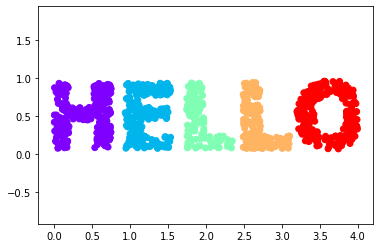

In [247]:
# Let's call the function and visualize the resulting data 
X = make_hello(1000)
colorize = dict(c=X[:,0],cmap=plt.get_cmap('rainbow', 5))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

# multi dimenstional scaling 

In [248]:
#rotating the data and shrink data 
def rotate(X,angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]
    return np.dot(X, R)


(4.497729497784161, 8.853279087512565, 4.963846684164707, 7.303151720409396)

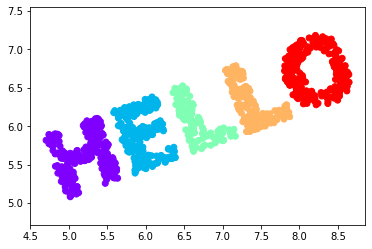

In [249]:
x2 = rotate(X,20) + 5
plt.scatter(x2[:,0],x2[:,1],**colorize)
plt.axis('equal')

In [250]:
# x2 = rotate(X,90) + 5 # rotation angle is 90 degrees
# plt.scatter(x2[:,0],x2[:,1],**colorize)
# plt.axis('equal')

In [251]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

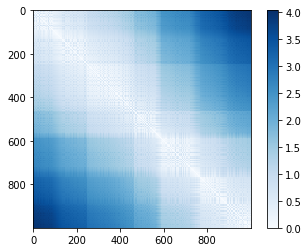

In [252]:
plt.imshow(D,zorder=2,cmap='Blues',interpolation='nearest')
plt.colorbar()

In [253]:
D2 = pairwise_distances(x2)
np.allclose(D,D2)

True

# finally with help of the mainfold algorithams with help of high dimensionality dataset 
# it will preserve the the minimal features 

(-2.070223239613705,
 2.130799170164047,
 -1.3777423146786199,
 1.3776009759933698)

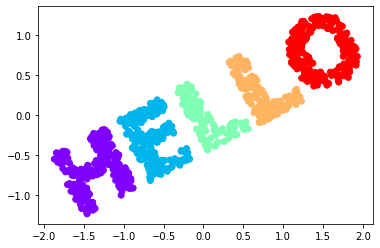

In [254]:
from sklearn.manifold import MDS
model = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out = model.fit_transform(D2)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')

# mds as mainfold lerning 

In [ ]:
def random_projection(X,dimension=3,rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension,dimension)
    e, V = np.linalg.eigh(np.dot(C,C.T))
    return np.dot(X,V[:X.shape[1]])


In [260]:
x3 = random_projection(X, 3)
x3.shape

(1000, 3)

# let's visualize these points to see what we're working 

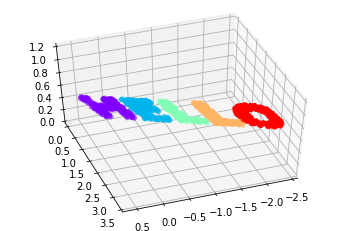

In [262]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(x3[:,0],x3[:,1],x3[:,2],**colorize)
ax.view_init(azim=70,elev=50)

(-2.070223239613698, 2.1307991701639457, -1.377742314678587, 1.377600975992673)

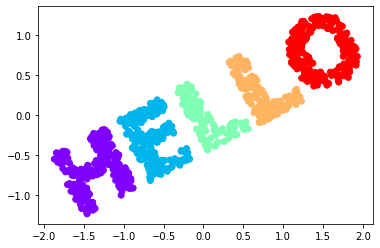

In [263]:
model = MDS(n_components=2,random_state=1)
out3 = model.fit_transform(x3)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')